# Classification Algorithms for Prediction of Target Values

## Introduction
In this notebook I will explain the program I wrote for our second competiton. I used several methods to make the data given cleaner and better for using to train my model. I used z-score to find outliers, I replaced the infinite values with NaN's and filled in the null data with mean values.I used corralation matrix and feature plots to further understand and visualize the train data. Then I used the training set to train three algoritms, compare each of them, and pick the model that gives a closer prediction to our target. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


train = pd.read_csv(r'/kaggle/input/math482-2024-2025-1-hw-02-v2/train.csv')
test = pd.read_csv(r'/kaggle/input/math482-2024-2025-1-hw-02-v2/test.csv')


The first thing that I did was to import all the libraries that will be necessary for me to move further. Then I created two dataframes called "train" and "test" which includes the data that is given to us to work on.

## Exploratory Data Analysis

I found the data values in the "train" that are infinite and converted them into NaN varibales, then found all the empty (null) datas and replaced them with the mean values of the correlated feature. This way the train data became cleaner to work with.

In [2]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

missing_values = train.isnull().sum()
print(missing_values)

train.fillna(train.mean(), inplace=True)


print((train == np.inf).sum())
print((train == -np.inf).sum())

id              0
feature_01      0
feature_02      0
feature_03      0
feature_04      0
feature_05      0
feature_06      0
feature_07      0
feature_08    350
feature_09    350
feature_10      0
feature_11      0
feature_12      0
feature_13      0
feature_14      0
feature_15      0
feature_16      0
feature_17      0
feature_18      0
feature_19      0
feature_20      0
feature_21    350
feature_22      0
feature_23      0
feature_24      0
feature_25    350
feature_26      0
feature_27      0
target          0
dtype: int64
id            0
feature_01    0
feature_02    0
feature_03    0
feature_04    0
feature_05    0
feature_06    0
feature_07    0
feature_08    0
feature_09    0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
target        0
d

I used the z-scores function to find the outliers in the train data. Printed out the sum of outliers in each feature to see which ones include more outliers in them.

In [3]:
z_scores = train.apply(zscore)

# Check for values with Z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)
outliers_sum = outliers.sum()
print(outliers_sum)

id              0
feature_01    259
feature_02    184
feature_03    383
feature_04    607
feature_05    223
feature_06    288
feature_07    326
feature_08    389
feature_09    320
feature_10    193
feature_11    370
feature_12    192
feature_13    385
feature_14    258
feature_15    390
feature_16    698
feature_17    325
feature_18    386
feature_19    715
feature_20    299
feature_21    321
feature_22    301
feature_23    256
feature_24    341
feature_25    273
feature_26    392
feature_27    209
target          0
dtype: int64


Afterwards, I cleansed my data from the outliers with the below code segment.

In [4]:

# Remove outliers based on a threshold for each feature
threshold = 3  # Z-score threshold
outliers = (z_scores > threshold) | (z_scores < -threshold)
train_data_cleaned = train[~outliers.any(axis=1)] 

I then created a correlation matrix and used heatmap from seaborn package to visualize the matrix. It helped me gain insight on the correlation between features and the target values.

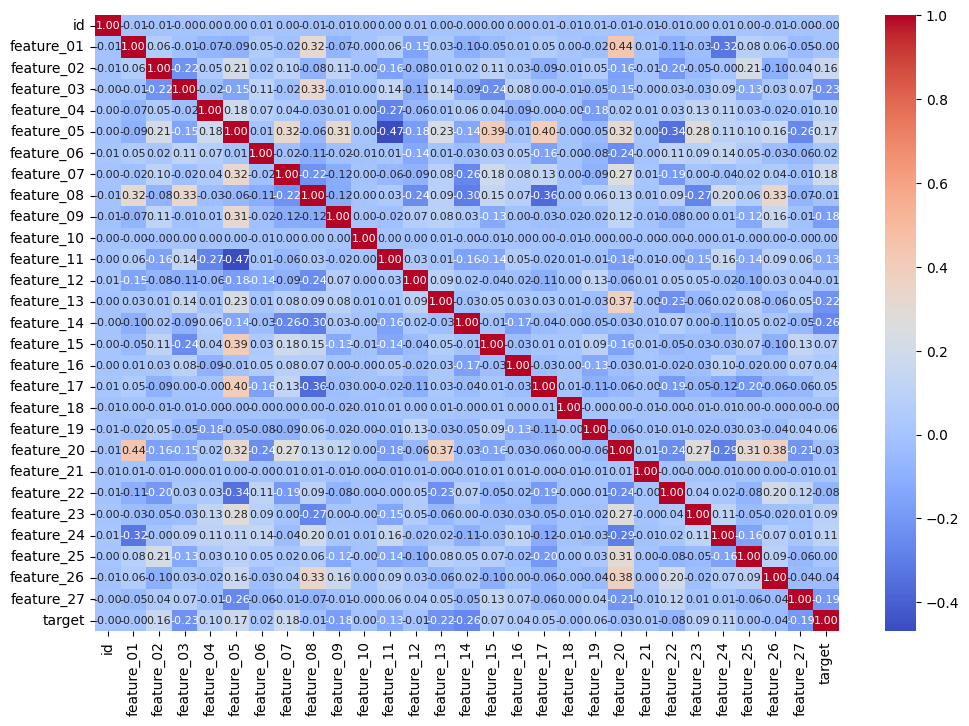

In [5]:
# Correlation matrix
correlation_matrix = train.corr()
plt.figure(figsize=(12, 8))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',annot_kws={'size': 8},)
plt.show()

As a part of my exploratory data analysis, I wanted to see the distribution graphs of each feature to further visualize the data set. With the Kernel density estimate I was able to see the continuous estimate of the data distribution and the shape it creates.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


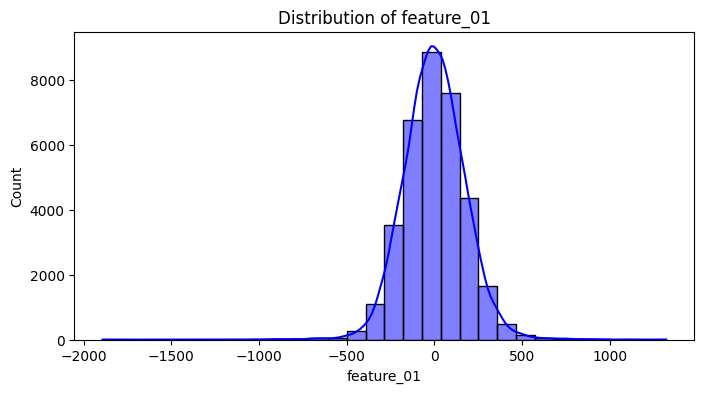

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


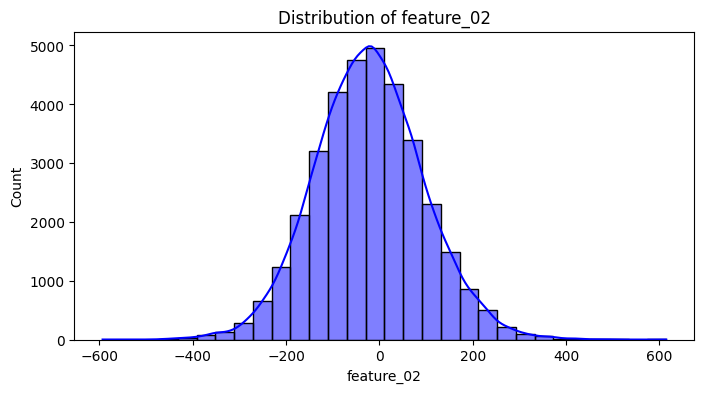

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


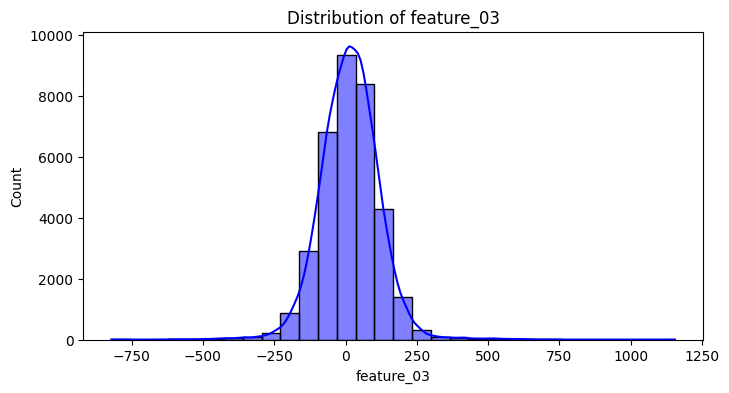

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


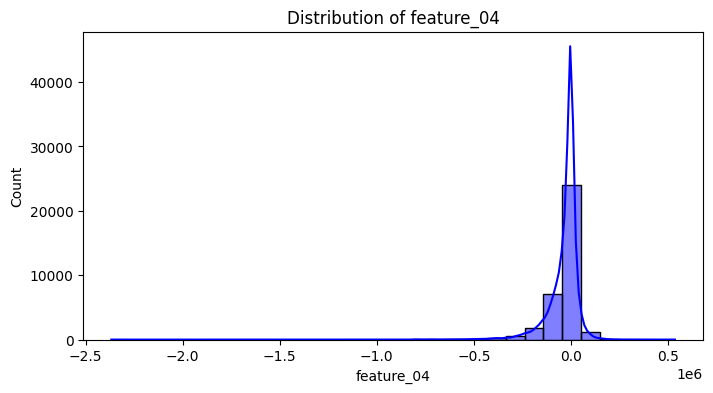

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


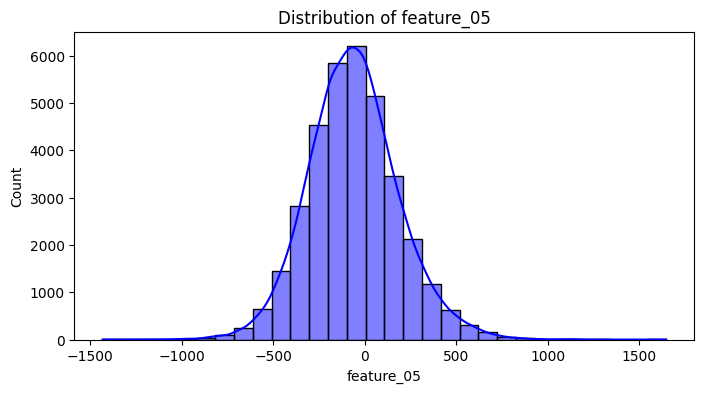

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


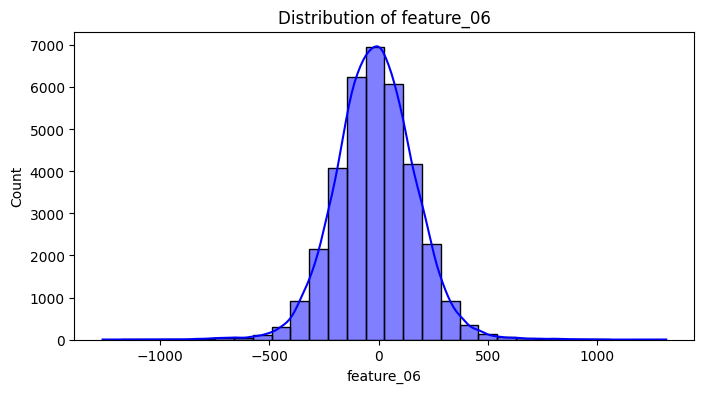

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


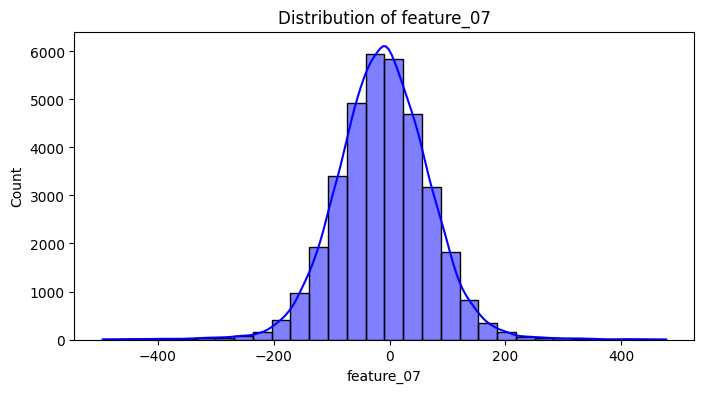

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


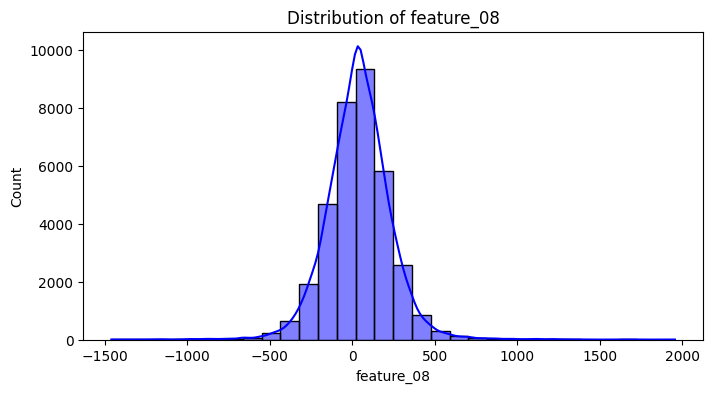

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


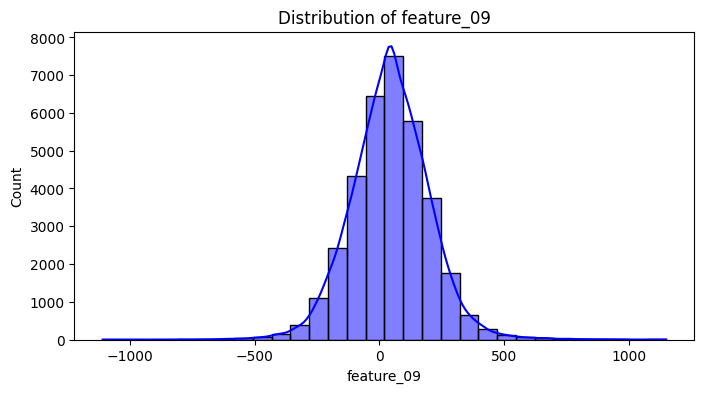

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


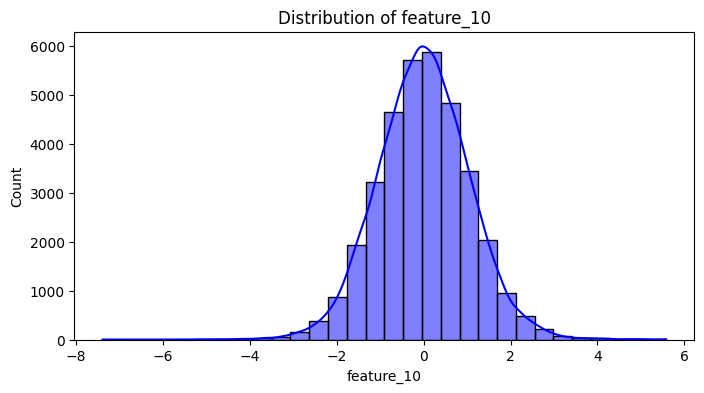

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


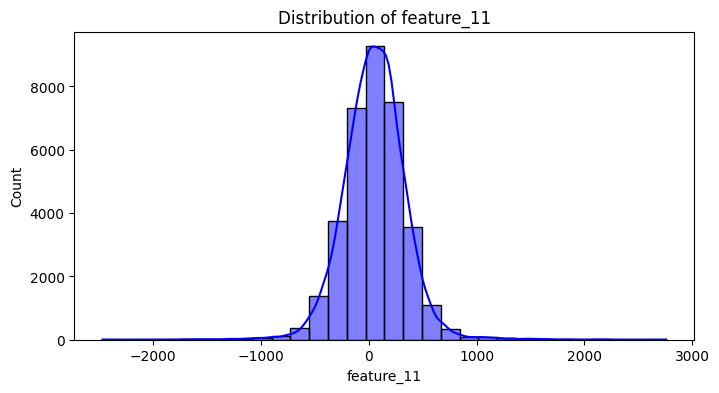

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


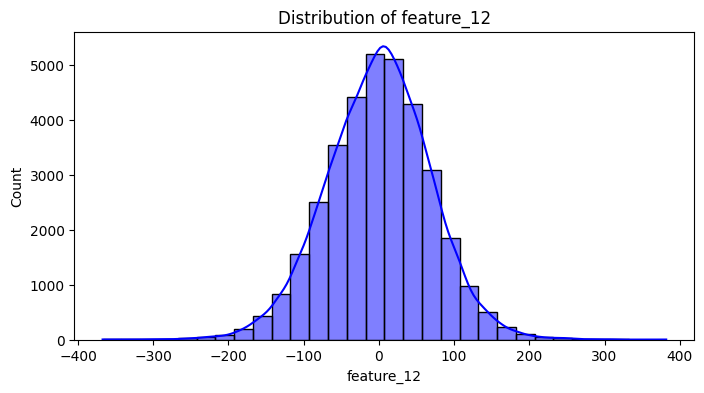

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


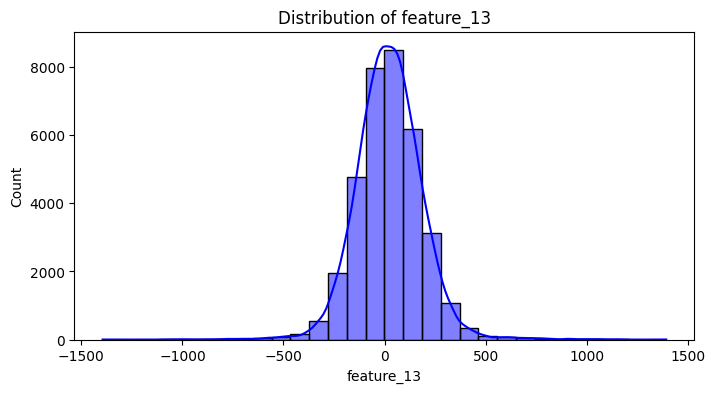

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


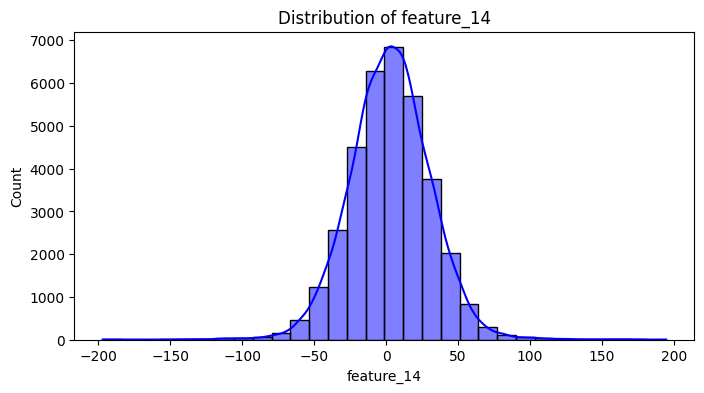

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


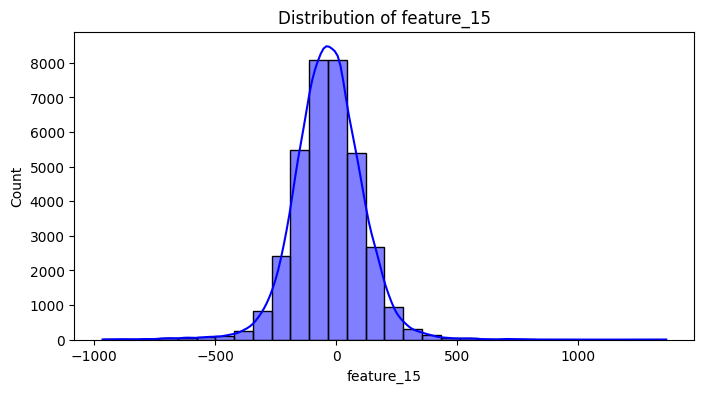

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


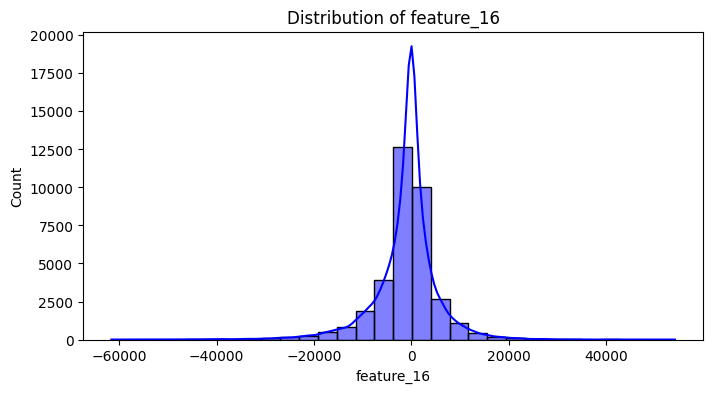

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


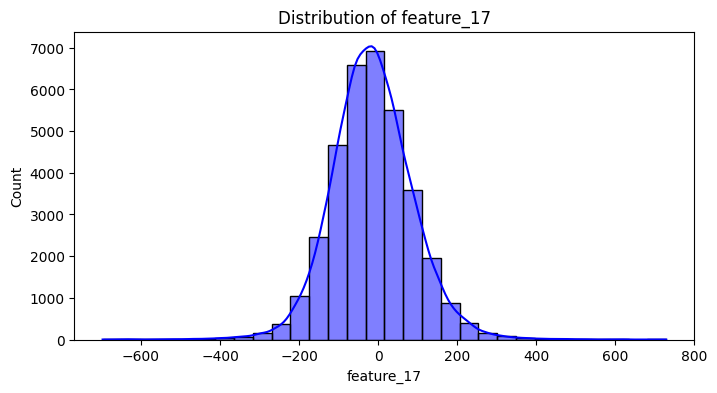

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


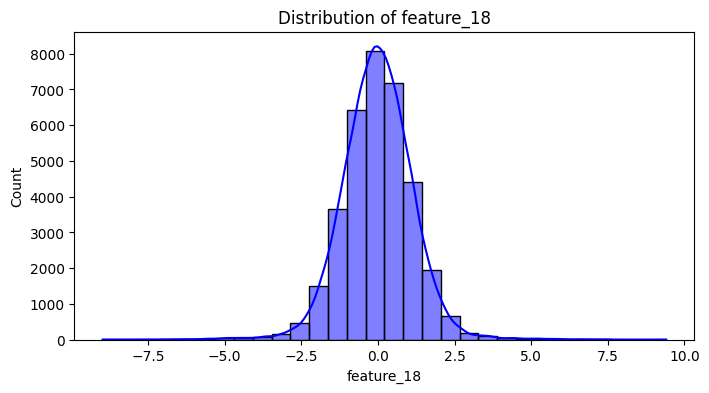

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


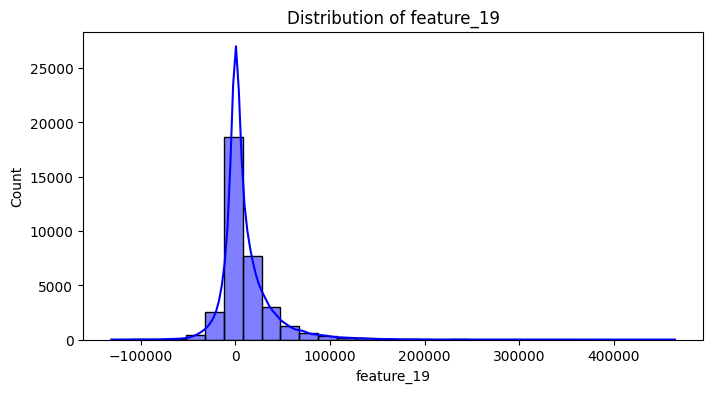

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


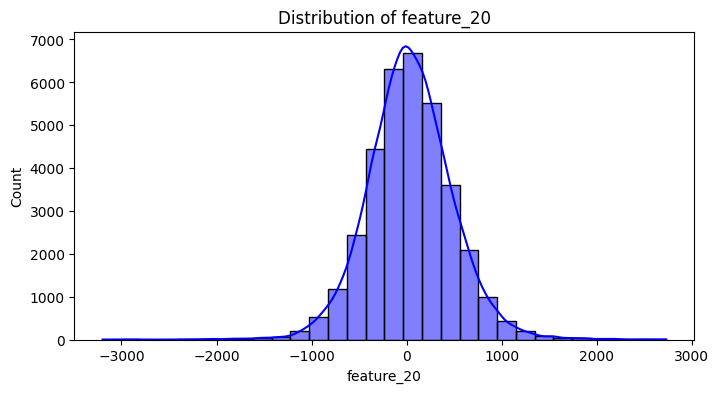

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


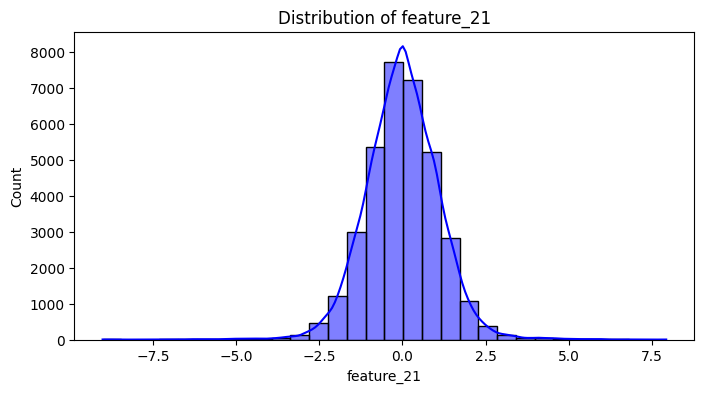

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


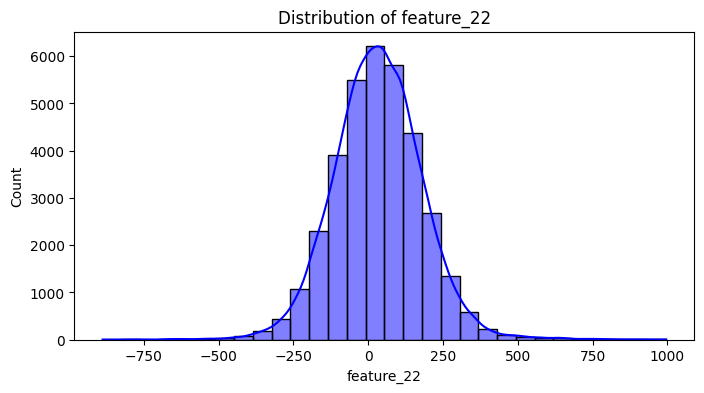

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


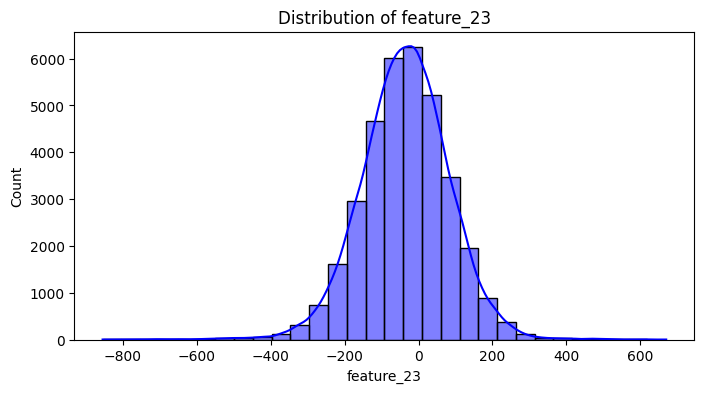

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


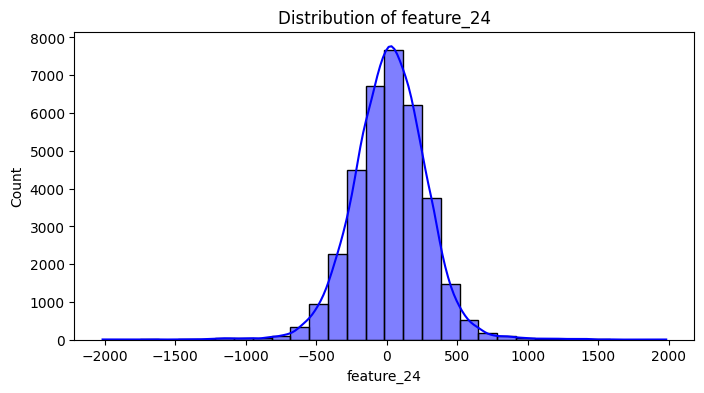

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


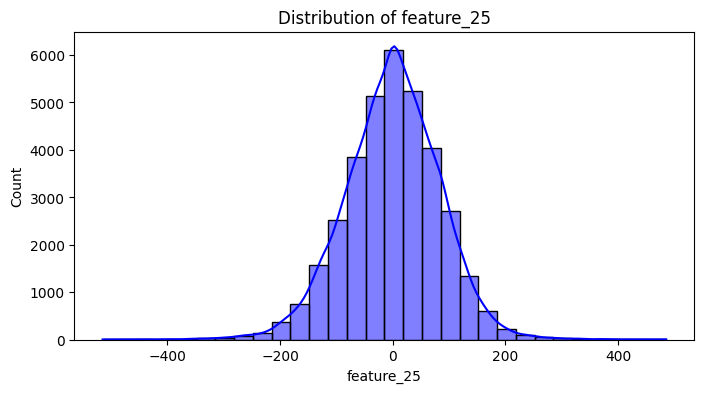

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


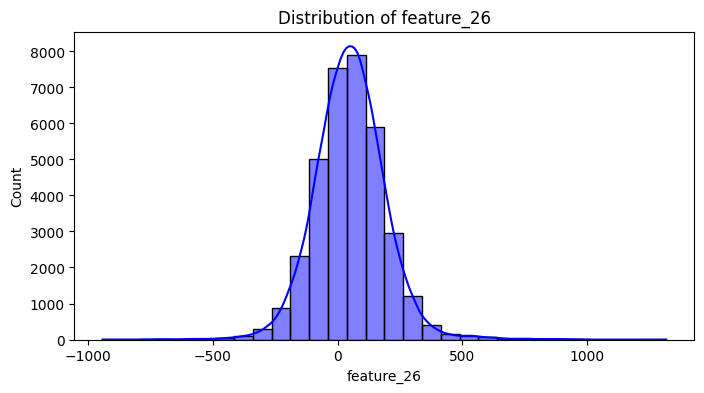

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


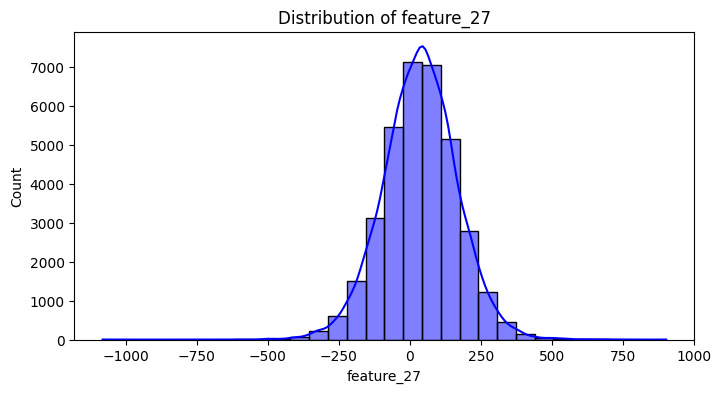

In [6]:
for column in train.columns.drop(['id', 'target']):  # Exclude non-numeric columns
    plt.figure(figsize=(8, 4))
    sns.histplot(train[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

I wanted to find the features that negatively affect the prediction of target values, the code below gave me accuracy values of the train data with all of the features in comparison to the train data with dropping one feature each time. This way I found out dropping which features gave a higher accuracy or less important compared to the other features. These features came out to be 10th,18th and 21th. 

In [7]:

'''
target_column = "target"
X1 = train_data_cleaned.drop(columns=[target_column])
y1 = train_data_cleaned[target_column]


X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier


# Train model
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train1, y_train1)

# Validate
y_val_pred = rf_model1.predict(X_val1)


importances = rf_model1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train1.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

baseline_score = accuracy_score(y_val1, rf_model1.predict(X_val1))

for feature in X_train1.columns:
    X_train_temp = X_train1.drop(columns=[feature])
    X_val_temp = X_val1.drop(columns=[feature])

    rf_model1.fit(X_train_temp, y_train1)
    score = accuracy_score(y_val1, rf_model1.predict(X_val_temp))
    print(f"Dropping {feature}: Accuracy = {score:.4f} (Baseline = {baseline_score:.4f})")
'''

'\ntarget_column = "target"\nX1 = train_data_cleaned.drop(columns=[target_column])\ny1 = train_data_cleaned[target_column]\n\n\nX_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.2, random_state=42)\n\n\nfrom sklearn.ensemble import RandomForestClassifier\n\n\n# Train model\nrf_model1 = RandomForestClassifier(random_state=42)\nrf_model1.fit(X_train1, y_train1)\n\n# Validate\ny_val_pred = rf_model1.predict(X_val1)\n\n\nimportances = rf_model1.feature_importances_\nfeature_importance_df = pd.DataFrame({\'Feature\': X_train1.columns, \'Importance\': importances})\nfeature_importance_df = feature_importance_df.sort_values(by=\'Importance\', ascending=False)\nprint(feature_importance_df)\n\nbaseline_score = accuracy_score(y_val1, rf_model1.predict(X_val1))\n\nfor feature in X_train1.columns:\n    X_train_temp = X_train1.drop(columns=[feature])\n    X_val_temp = X_val1.drop(columns=[feature])\n\n    rf_model1.fit(X_train_temp, y_train1)\n    score = accuracy_score(y_va

## Solution Approach 

After the analysis I did on the data, I went on with the solution part where I tried multiple models and worked on my predictions. Initially, I dropped the target column along with the features that negatively affect the accuracy and created my X set. Then assigning the target values to y, I splitted the test into 2, the training part containing the 80%.

In [8]:

target_column = "target"
X = train_data_cleaned.drop(columns=[target_column,'feature_10','feature_18','feature_21'])
y = train_data_cleaned[target_column]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape) 


(24946, 25)
(24946,)


As my first classification method, I used the Random Forest Classifier at the random state of 42. I started with the random forest classification due to its robustness, I didn't need to use scaling or manually define complex relationships between features.

The accuracy it gave me was around 0,8757.

In [9]:

from sklearn.ensemble import RandomForestClassifier


# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Validate
y_val_pred = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_val_pred))


Random Forest Accuracy: 0.8757415424082091


Then I imported the 2nd classification method which is XG Classifier. I knew that since XG boost classifier uses gradient boosting it has high predictive power and since it has built in regularization it helps prevent overfitting. It also has the flexibility for tuning which I used in the latter step.

This time the accuracy score increased to 0,9183. I thought I could work on the parameters of the classifier and wrote the code in section [24], since it takes long for GridSearch to run I left it in quotes in the notebook. From the output " {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}" I decided to use these parameters instead.

In [10]:
from xgboost import XGBClassifier

# Train model
xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)

xgb_model.fit(X_train, y_train)


# Validate
y_val_pred = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_val_pred))

XGBoost Accuracy: 0.918390251723585


In [11]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'n_estimators': [100, 200, 500],\n    'max_depth': [3, 5, 10],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'subsample': [0.8, 1.0]\n}\ngrid_search = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv=3, scoring='accuracy')\ngrid_search.fit(X_train, y_train)\nprint(grid_search.best_params_)\n"

With the added specified parameters, the accuracy increased to around 0,9363.

In [12]:


xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.2,
    subsample=0.8,
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)


# Validate
y_val_pred = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_val_pred))

XGBoost Accuracy: 0.9363476030142697


As my final model I wanted to create a stacking ensamble that uses decision tree classifier as its meta model. With this I was able to use the strengths of both random forest and xgboost classifiers. The stacked model I had gave an accuracy of 0,9360

In [13]:
from sklearn.tree import DecisionTreeClassifier
meta_model = DecisionTreeClassifier(max_depth=3, random_state=42)
from sklearn.ensemble import StackingClassifier

# Define the stacking ensemble
stacked_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),  # Random Forest
        ('xgb', xgb_model)  # XGBoost
    ],
    final_estimator=meta_model,
    cv=5  # Optional: number of folds for cross-validation
)

# Fit the stacking model on the training data
stacked_model.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred = stacked_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Stacking Classifier Accuracy:", accuracy)

Stacking Classifier Accuracy: 0.936026936026936


It seemed like the xgboost gave a higher accuracy, but it might have been caused by overfitting instead. So I imported the cross_val_score to see if the mean CV scores allign with the accuracy values I've found. The output came as :

'Cross-Validation Scores xgboost: [0.90155523 0.93907327 0.93554594 0.93184734 0.93970494]
Mean CV Score xgboost: 0.929545343988363
Cross-Validation Scores stacked: [0.90877024 0.93025493 0.92929293 0.93072482 0.93713919]
Mean CV Score stacked: 0.9272364234091'


It alligned with the previous results which indicates xgboost gives a slightly better accuracy. So I decided to use the xgboost for my final model.    
837

In [14]:
'''

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores xgboost:", scores)
print("Mean CV Score xgboost:", scores.mean())


scores = cross_val_score(stacked_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores stacked:", scores)
print("Mean CV Score stacked:", scores.mean())
'''

'\n\nfrom sklearn.model_selection import cross_val_score\nscores = cross_val_score(xgb_model, X, y, cv=5, scoring=\'accuracy\')\nprint("Cross-Validation Scores xgboost:", scores)\nprint("Mean CV Score xgboost:", scores.mean())\n\n\nscores = cross_val_score(stacked_model, X, y, cv=5, scoring=\'accuracy\')\nprint("Cross-Validation Scores stacked:", scores)\nprint("Mean CV Score stacked:", scores.mean())\n'

I cleaned the test data from the features with negative effect,so that it is suitable to use with my final model. Afterwards, I fit my model to the whole training data, since there was a part used just for testing. Using more data for training  leads to a greater chance to have a better accuracy on the real test data.

With the xgboost model fit to the whole train set, I created my submission file for this assignment as 'submission.csv'.

In [15]:
test_clean = test.drop(columns=['feature_10','feature_18','feature_21'])

xgb_model.fit(X, y)

test_predictions = xgb_model.predict(test_clean)
# Create a DataFrame with the predictions and their indexes
predictions_df = pd.DataFrame({
    'id': range(1, len(test_predictions)+1),
    'target': test_predictions
})

# Save to CSV
predictions_df.to_csv('submission.csv', index=False)

## Conclusion

In this notebook, I started by analyzing the 'train' dataset and creating plots and histograms to explore the data. I then applied feature engineering to the dataset to generate an accurate prediction and trained 3 classification models on the refined data. My final model ,that used the XGBoost Classifier, was trained on a dataset that excluded certain features, missing values ,and outliers.